In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from helper.database_connection_helper import get_collection

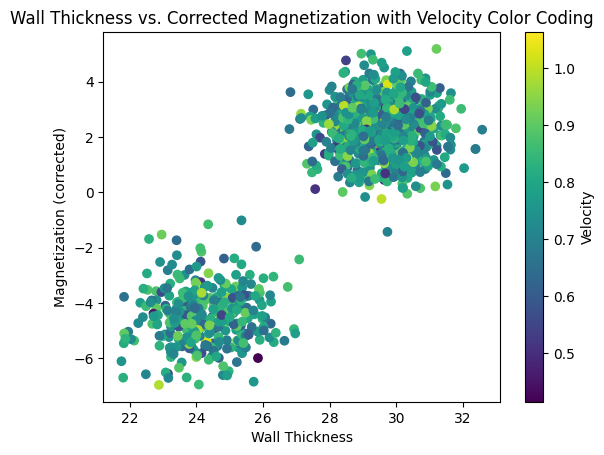

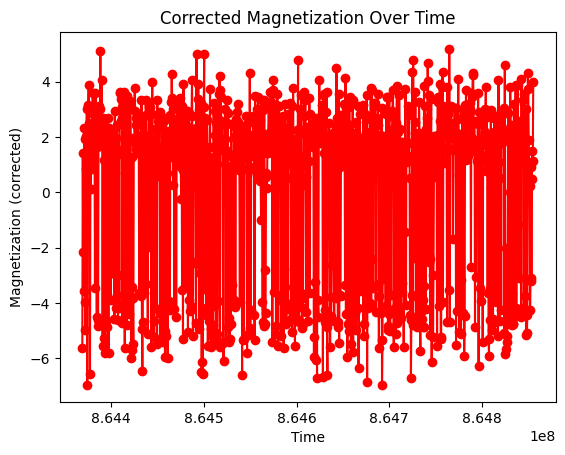

In [26]:
collection = get_collection()

document = collection.find({'_id': '000bc7ea-8918-420c-bd13-30e1a6e8dd00'})[0]


df = pd.DataFrame({
    'velocity': document['velocity'],
    'wall_thickness': document['wall_thickness'],
    'magnetization': document['magnetization'],
    'timestamp': document['timestamp']
})

X = np.arange(len(df)).reshape(-1, 1)
y = df['magnetization'].values
model = LinearRegression().fit(X, y)
trend = model.predict(X)

df['magnetization_corrected'] = df['magnetization'] - trend

fig, ax = plt.subplots()

sc = ax.scatter(df['wall_thickness'], df['magnetization_corrected'], c=df['velocity'], cmap='viridis')

plt.colorbar(sc, label='Velocity')

ax.set_xlabel('Wall Thickness')
ax.set_ylabel('Magnetization (corrected)')
ax.set_title('Wall Thickness vs. Corrected Magnetization with Velocity Color Coding')

# Additional plot for corrected magnetization as a line plot.
fig3, ax3 = plt.subplots()
ax3.plot(df['timestamp'], df['magnetization_corrected'], marker='o', linestyle='-', color='red')
ax3.set_xlabel('Time')
ax3.set_ylabel('Magnetization (corrected)')
ax3.set_title('Corrected Magnetization Over Time')

plt.show()